<a href="https://colab.research.google.com/github/YahiaZakariaBenkhira/Machine-Learning/blob/main/Lithology_Facies_Classification_using_Machine_Learning_Models_and_Log_Plotting%20for%20Model%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lithology Facies Classification using Machine Learning Models and Log Plotting


Facies classification stands as a cornerstone within geoscience endeavors, particularly in the realms of development and exploration projects. It serves as a crucial tool for understanding the intricate sedimentary environments that have shaped Earth's surface over time. Sedimentary facies offer invaluable insights into the physical, chemical, and biological conditions prevalent during the sedimentation process.

In the pursuit of comprehending these facies, geoscientists rely on rock samples obtained from various geological formations. In recent years, there has been a notable shift towards leveraging machine learning techniques to predict facies from well log data. This paradigm shift enables geoscientists to extract meaningful information from large datasets efficiently.

In this study, we delve into the realm of supervised classification, utilizing log data sourced from the Hugoton and Panoma Fields in North America. These datasets, initially introduced in a class exercise at The University of Kansas (Dubois et al., 2007), comprise log data from nine distinct wells. Our objective is to train a suite of supervised classifiers to predict discrete facies groups based on these well log data.

The implementation of these classifiers is facilitated through the scikit-learn library, a versatile machine learning framework widely acclaimed for its user-friendly interface and robust functionality. The classifiers enlisted for this study encompass a diverse array of algorithms, including:

1) Support Vector Machines (SVM)<br>
2) Gaussian Process Classification (GPC)<br>
3) Random Forest Classifier (RFC)<br>
4) Multi-layer Perceptron Classifier (NNC)<br>
5) K Nearest Neighbors Classifier (KNN)<br>
6) Decision Tree Classifier (DT)<br>
7) Logistic Regression (LR)<br>
8) Gradient Boost Classifier (GB)<br>
9) Light Gradient Boost Classifier (LGB)<br>
10) CatBoost Classifier (CatBoost)<br>

By harnessing the power of these machine learning algorithms, we aim to unlock the potential inherent in well log data, paving the way for more accurate and efficient facies prediction in geoscience applications.

As with any data science endeavor, our journey begins with a thorough examination of the dataset. We'll delve into the various features encapsulated within the well data, employing techniques such as cross plots and visualizations of well log data to gain deeper insights.

Once we've acquainted ourselves with the dataset, our next task involves data conditioning and preprocessing. This crucial step entails identifying and handling incomplete or missing data, ensuring that our dataset is pristine and devoid of any anomalies. To enhance the performance of our machine learning models, we'll standardize the data by scaling it to zero mean and unit variance, thereby fostering optimal model efficiency.

With our data prepped and primed, we'll partition it into three distinct sets: training, test, and blind well data. This segregation ensures that our models are trained on a subset of the data, validated on another, and ultimately tested on unseen data to assess their generalization capabilities.

Now comes the heart of our endeavor: the application of various machine learning classifiers to our dataset. Drawing inspiration from the work of Brendon Hall and leveraging his insightful approaches, we'll explore an array of machine learning techniques beyond Support Vector Machines (SVM). Our aim is to identify the most suitable classifier that best encapsulates the underlying patterns and structures within the data.

Having trained our models, we'll subject them to rigorous testing using the designated test data. This step allows us to evaluate the performance of each model, gauging metrics such as accuracy, precision, and recall to ascertain their efficacy in facies prediction.

In the final phase of our analysis, we'll conduct a robust validation exercise using a blind well—one that remained untouched during the model building process. This pivotal step serves as the litmus test for our models' performance in real-world scenarios, providing valuable insights into their reliability and generalization capabilities beyond the confines of the training data.

Throughout our journey, we'll draw upon data description, plotting functions, and methodologies from Brendon Hall's work, augmenting them with our own insights and methodologies. By adopting a comprehensive approach and exploring a diverse range of machine learning algorithms, we aim to unlock the full potential of our dataset and pave the way for more accurate and efficient facies classification in geoscience applications.

## Data Understanding & Wrangling

There are plenty of learning materials we have [here](http://www.people.ku.edu/~gbohling/EECS833/) for this data set. The training data stored in CSV format contains 5 wireline log measurements, two indicators and facies label in half foot interval.
In machine learning terminology, each log measurement is a feature vector that maps a set of 'features' (the log measurements) to a class (the facies type).  We will use the pandas library to load the data into a dataframe, which provides a convenient data structure to work with well log data.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [2]:
# read data into python as dataframe
dataset = 'facies_vectors.csv'
training_data = pd.read_csv(dataset)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


The Council Grove gas reservoir, situated in Kansas, serves as the focal point of our study. Within this carbonate reservoir lie nine wells, collectively yielding a dataset comprising 4149 examples. Our exploration revolves around the meticulous examination of facies, which are deduced from core samples extracted at half-foot intervals and meticulously matched with logging data obtained from the well locations. Our dataset encompasses seven feature variables, including five derived from wireline log measurements and two geologic constraining variables grounded in geological knowledge.

The seven variables under scrutiny are as follows:

1. **GR**: This wireline logging tool gauges gamma emission from the formation, making it a reliable index for assessing shale content.
2. **ILD_log10**: A measurement of resistivity, crucial for identifying reservoir fluid content.
3. **PE**: The photoelectric effect log, instrumental in lithology (mineral content of rock) identification.
4. **DeltaPHI**: Represents the difference between porosity indices, with various methods such as neutron and density logs used to measure porosity.
5. **PNHIND**: The average of neutron and density logs, providing insights into formation properties.
6. **NM_M**: A nonmarine-marine indicator, shedding light on the depositional environment.
7. **RELPOS**: Relative position within the wellbore, offering spatial context to the data.

The nine discrete facies, or classes of rocks, delineated within our study are as follows:

1. **(SS)** Nonmarine sandstone
2. **(CSiS)** Nonmarine coarse siltstone
3. **(FSiS)** Nonmarine fine siltstone
4. **(SiSH)** Marine siltstone and shale
5. **(MS)** Mudstone (limestone)
6. **(WS)** Wackestone (limestone)
7. **(D)** Dolomite
8. **(PS)** Packstone-grainstone (limestone)
9. **(BS)** Phylloid-algal bafflestone (limestone)

Geologically, the boundaries between these facies may exhibit transitional characteristics, blurring clear distinctions. To navigate these nuances, it's imperative to understand the approximate neighbors of each facies, facilitating a comprehensive interpretation of the geological setting.

Facies |Label| Adjacent Facies
:---: | :---: |:--:
1 |SS| 2
2 |CSiS| 1,3
3 |FSiS| 2
4 |SiSh| 5
5 |MS| 4,6
6 |WS| 5,7
7 |D| 6,8
8 |PS| 6,7,9
9 |BS| 7,8

Let's clean up this dataset.  The 'Well Name' and 'Formation' columns can be turned into a categorical data type.  

In [3]:
training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN',
                          'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

These are the names of the 10 training wells in the Council Grove reservoir.  Data has been recruited into pseudo-well 'Recruit F9' to better represent facies 9, the Phylloid-algal bafflestone.

Before we plot the well data, let's define a color map so the facies are represented by consistent color in all the plots in this tutorial.  We also create the abbreviated facies labels, and add those to the `facies_vectors` dataframe.

In [4]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [5]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


This is a quick view of the statistical distribution of the input variables. Looking at the count values, most values have 4149 valid values except for PE, which has 3232. In this tutorial we will drop the feature vectors that don't have a valid PE entry.

In [6]:
PE_mask = training_data['PE'].notnull().values
training_data = training_data[PE_mask]

Let's take a look at the data from individual wells in a more familiar log plot form.  We will create plots for the five well log variables, as well as a log for facies labels.  The plots are based on the those described in Alessandro Amato del Monte's [excellent tutorial](https://github.com/seg/tutorials/tree/master/1504_Seismic_petrophysics_1).

Remove a single well to use as a blind test later.

In [7]:
blind = training_data[training_data['Well Name'] == 'LUKE G U']
training_data = training_data[training_data['Well Name'] != 'LUKE G U']

In [8]:
training_data.shape

(2771, 12)

In [9]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

Placing the log plotting code in a function will make it easy to plot the logs from multiples wells, and can be reused later to view the results when we apply the facies classification model to other wells.  The function was written to take a list of colors and facies labels as parameters.  

We then show log plots for wells `SHRIMPLIN`.  

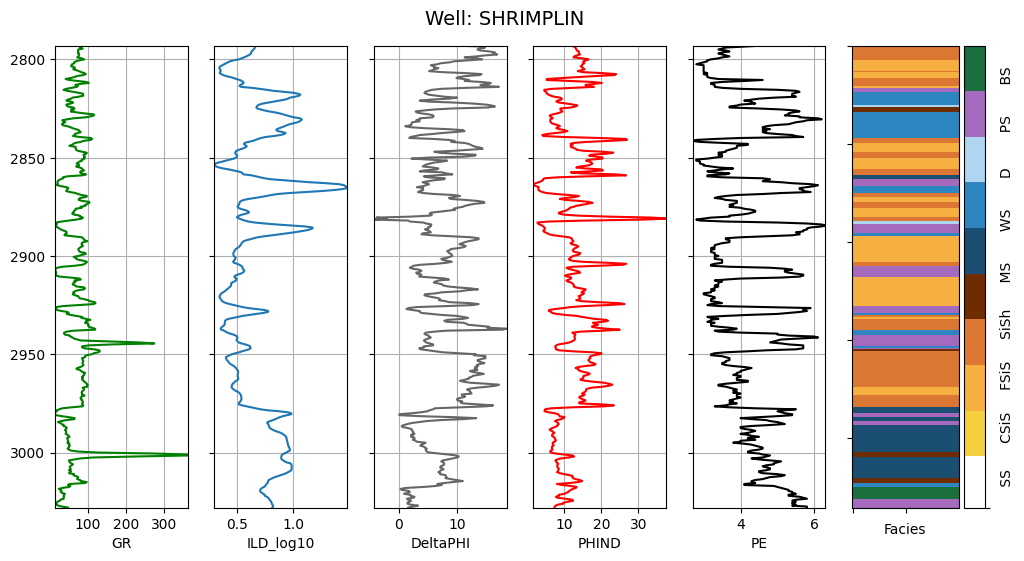

In [10]:
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)
#plt.savefig("SHRIMPLIN_X1", dpi=400)

In addition to individual wells, we can look at how the various facies are represented by the entire training set.  Let's plot a histogram of the number of training examples for each facies class.

SS      259
CSiS    621
FSiS    486
SiSh    149
MS      215
WS      378
D        78
PS      424
BS      161
Name: Facies, dtype: int64

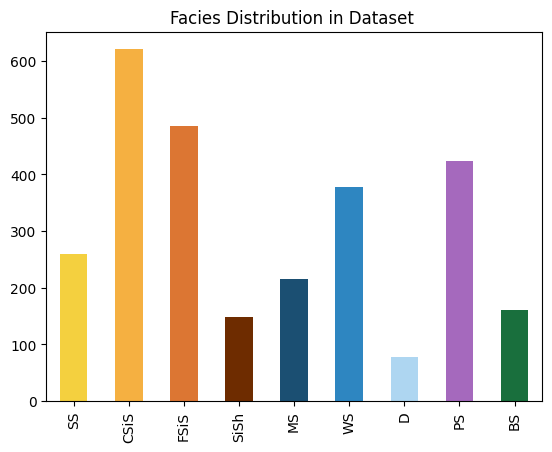

In [11]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors,
                   title='Facies Distribution in Dataset ')
facies_counts
#plt.savefig("F_Dist.png", dpi=300)

This shows the distribution of examples by facies for the examples in the training set.  Dolomite (facies 7) has the fewest with 81 examples.  Depending on the performance of the classifier we are going to train, we may consider getting more examples of these facies.

Crossplots are a familiar tool in the geosciences to visualize how two properties vary with rock type.  This dataset contains 5 log variables, and scatter matrix can help to quickly visualize the variation between the all the variables in the dataset.  We can employ the very useful [Seaborn library](https://stanford.edu/~mwaskom/software/seaborn/) to quickly create a nice looking scatter matrix. Each pane in the plot shows the relationship between two of the variables on the x and y axis, with each point is colored according to its facies.  The same colormap is used to represent the 9 facies.  

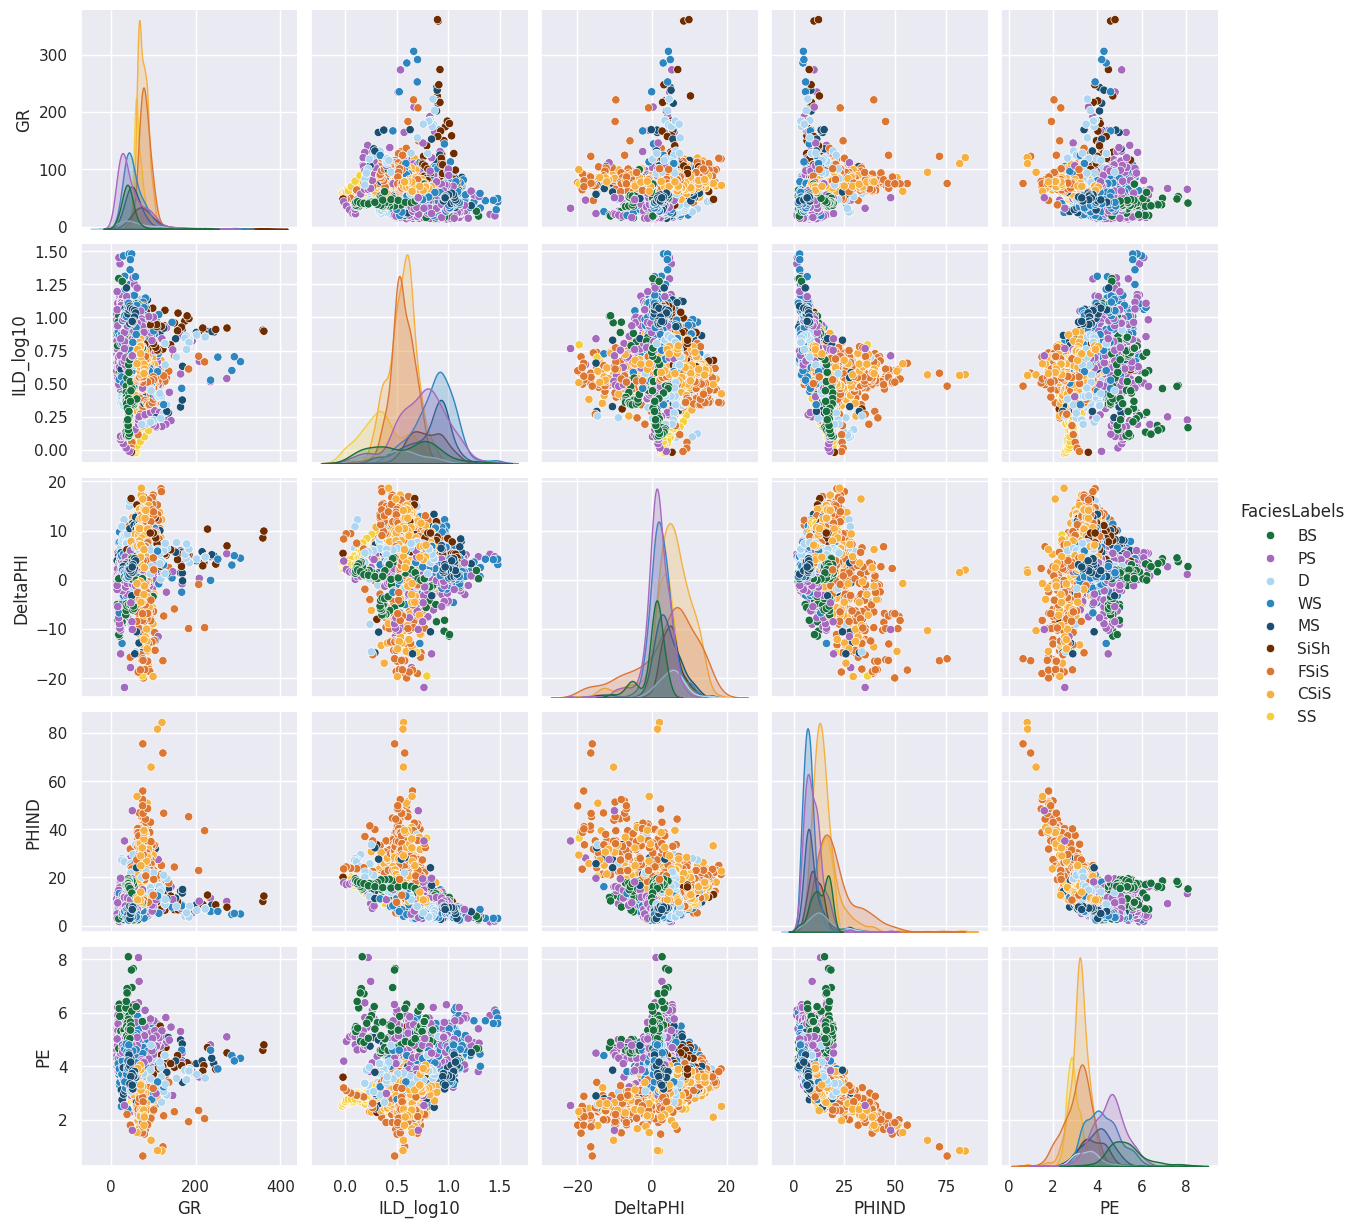

In [12]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

sns.set()
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

In [13]:
# Get correlation
training_data.corr()

<ipython-input-13-87fe183096a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  training_data.corr()


,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.398733,-0.324910,0.381203,-0.242771,-0.344313,0.712794,0.851121,0.064144
Depth,0.398733,1.000000,-0.080521,0.207127,-0.072548,-0.102938,0.311016,0.347173,0.006539
GR,-0.324910,-0.080521,1.000000,-0.155157,0.184664,0.229736,-0.274741,-0.278222,-0.179129
ILD_log10,0.381203,0.207127,-0.155157,1.000000,-0.117632,-0.509303,0.363799,0.505878,0.084667
DeltaPHI,-0.242771,-0.072548,0.184664,-0.117632,1.000000,-0.274934,0.031070,-0.191740,0.038313
PHIND,-0.344313,-0.102938,0.229736,-0.509303,-0.274934,1.000000,-0.561215,-0.483767,-0.033471
PE,0.712794,0.311016,-0.274741,0.363799,0.031070,-0.561215,1.000000,0.658844,0.010938
NM_M,0.851121,0.347173,-0.278222,0.505878,-0.191740,-0.483767,0.658844,1.000000,0.038155
RELPOS,0.064144,0.006539,-0.179129,0.084667,0.038313,-0.033471,0.010938,0.038155,1.000000


<ipython-input-80-ee6a2d2d5104>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(training_data.corr(), annot=True, fmt='.2f')


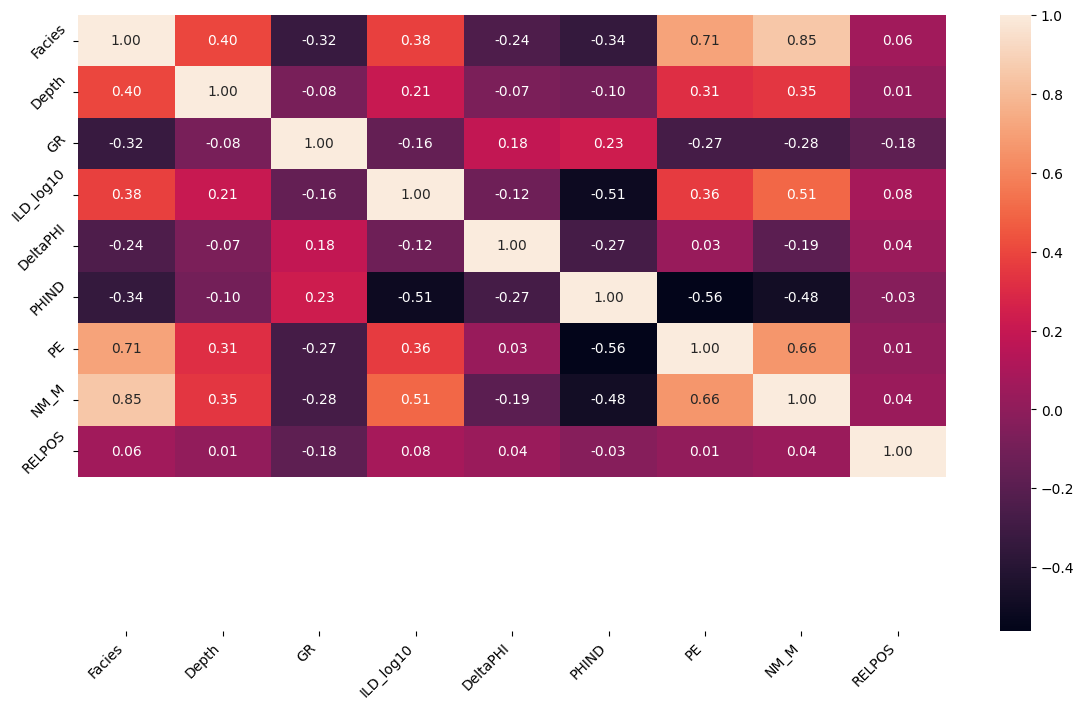

In [80]:
# Visualize data
plt.figure(figsize=(14, 8))
ax = sns.heatmap(training_data.corr(), annot=True, fmt='.2f')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.ylim(len(training_data.columns), 0)
plt.show()


It seems that the best correlation of target label(facies) belongs to geological factor of NM_M with 86% agreement. PE, which is lithology loging tools shows 70%.

## Data Conditioning

We need to select feature vaiables to perform the classification. These are the five wireline values and two geologic constraining variables. The target label as Facies need to selected as well.

In [15]:
correct_facies_labels = training_data['Facies'].values
feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

#### Preprocessing (make standard)

Almost all machine learning models work efficenctly when data is standardized for zero mean and unit variance. Using Scikit preprocessong module:

In [16]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

#### Preprocessing (Data split)

Using Scikit data split function, we may randomly split the training data into training and test sets. We select 20% of the data for the test set.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

# Modeling
There are [several](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) tyes of model approaches that can be used for Facies classificaiton. Explanation the basic concept behind each methods and pros/cons of them are out of scope of this study. Almost all data science book have chapters on it.

## Training the SVM classifier


In [18]:
from sklearn import svm
SVM_model = svm.SVC(C=10, gamma=1)

Here we used model parameters which is optimized by [Brendon Hall](https://github.com/brendonhall/facies_classification/blob/master/Facies%20Classification%20-%20SVM.ipynb).

In [19]:
SVM_model.fit(X_train,y_train)

SVC(C=10, gamma=1)

After fitting model, we can predict the result by test data

In [20]:
yhat_SVM = SVM_model.predict(X_test)

#### Model Evaluation
There are sevral metrices aviable to see how model perfrom on dataset and prediction. The basics for all types of evaluation is similar; how far/close the predicted data is from actual data.
##### Confusion matrix
It is a 2D array of predicted and actual target label. The entries of confusion matrix C[i][j] are equal to the number of observations predicted to have facies j, but are known to have facies i.

To simplify reading the confusion matrix, a function has been written to display the matrix along with facies labels and various error metrics. See the file classification_utilities in Scikit-learn.

Confusion Matrix:
[[37 11  0  0  1  0  0  0  0]
 [ 4 98 17  0  0  0  0  0  0]
 [ 3 23 70  2  0  0  0  0  0]
 [ 0  0  2 16  2  3  0  2  0]
 [ 0  1  2  2 20 14  1  6  0]
 [ 0  0  2  3  6 59  0  8  0]
 [ 0  0  0  0  0  3 12  1  0]
 [ 0  3  3  2  7 12  0 60  3]
 [ 0  0  0  1  0  1  0  2 30]]

Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        49
           2       0.72      0.82      0.77       119
           3       0.73      0.71      0.72        98
           4       0.62      0.64      0.63        25
           5       0.56      0.43      0.49        46
           6       0.64      0.76      0.69        78
           7       0.92      0.75      0.83        16
           8       0.76      0.67      0.71        90
           9       0.91      0.88      0.90        34

    accuracy                           0.72       555
   macro avg       0.74      0.71      0.73       555
weighted avg       0.73      0.72    

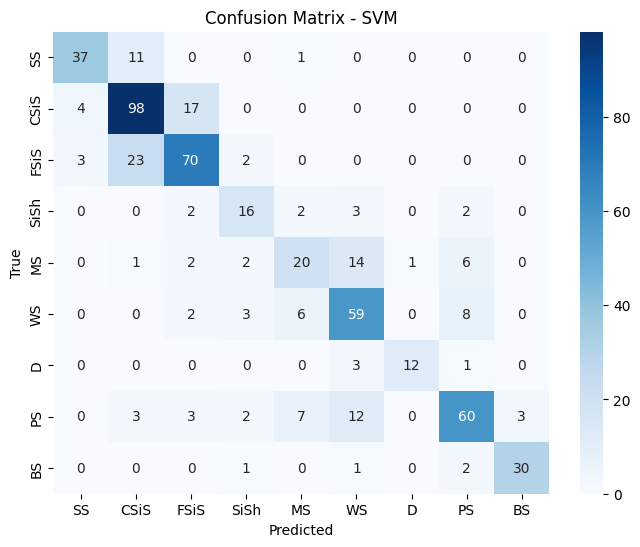

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_SVM = confusion_matrix(y_test, yhat_SVM)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_SVM)

# Display classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, yhat_SVM))
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=facies_labels, yticklabels=facies_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


The confusion matrix has rows and columns. The rows correspond to actual facies labels and columns show model prediction results. Let's look at the first column and row. SS is shown with 42 true predictions while 6 members of SS are predicted as CSiS and 2 as FSiS. As high value as a possible outcome of the model in diagonal of the matrix, as good as model prediction perfromance.

##### F1 Score

Precision and recall can be computed easily using the confusion matrix. Precision is the probability that given a classification result for a sample, the sample actually belongs to that class. Recall is the probability that a sample will be correctly classified for a given class.<br>
Let's look at the results and consider facies SS. In test set, if a sample was labeled SS the probability the sample was correct is 0.84 (precision). If we know a sample has facies SS, then the probability it will be correctly labeled by the classifier is 0.81 (recall). It is desirable to have high values for both precision and recall, but often when an algorithm is tuned to increase one, the other decreases. The F1 score combines both to give a single measure of relevancy of the classifier results.

These results can help guide intuition for how to improve the classifier results. For example, for a sample with facies MS or mudstone, it is only classified correctly 61% of the time (recall). Perhaps this could be improved by introducing more training samples. Sample quality could also play a role. Facies BS or bafflestone has the best F1 score and relatively few training examples. But this data was handpicked from other wells to provide training examples to identify this facies.


##### Jaccard Index
Jaccard similarity coefficient is defined as size of intersection of real (y) and predicted values (yp) divided by size of the union of those two labels.  $ J(y,y_p )=  (|y∩y_p |)/(|y∪y_p |) $. <br>
For example, for a set of size 10 samples with 8 correct prediction, this index will be 0.66.

In [27]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jSVM = jaccard_score(y_test, yhat_SVM, average = 'weighted')
f1SVM = f1_score(y_test, yhat_SVM, average='weighted')

print("Jaccard Similarity Score (SVM):", jSVM)
print("F1 Score (SVM):", f1SVM)


Jaccard Similarity Score (SVM): 0.5731667488395994
F1 Score (SVM): 0.722591900507799


## Training the GaussianProcessClassifier classifier

The GaussianProcessClassifier is a machine learning algorithm used for classification tasks. It belongs to the Gaussian Process (GP) family, which is a powerful probabilistic framework for modeling functions and uncertainty.

In the context of classification, the GaussianProcessClassifier fits a Gaussian process to the training data, where each data point is represented by a feature vector and associated class label. It then uses this model to make predictions on unseen data points by estimating the probability distribution over possible classes for each data point.

Key features of the GaussianProcessClassifier include its ability to capture complex relationships in the data and provide uncertainty estimates for its predictions. It is particularly useful in scenarios where the decision boundary between classes is not well-defined or when dealing with small or noisy datasets.

Overall, the GaussianProcessClassifier offers a flexible and robust approach to classification tasks, leveraging the rich probabilistic framework of Gaussian processes to provide reliable predictions and uncertainty estimates.

In [30]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

GPC_model = GaussianProcessClassifier().fit(X_train, y_train)

yhat_GPC = GPC_model.predict(X_test)
jGPC = jaccard_score(y_test, yhat_GPC, average = 'weighted')
f1GPC = f1_score(y_test, yhat_GPC, average='weighted')
print("GPC Jaccard index: %.3f" % jGPC)
print("GPC F1-score: %.3f" % jGPC )

conf_GPC = confusion_matrix(y_test, yhat_GPC)
print("Confusion Matrix:")
print(conf_GPC)

print("\nClassification Report:")
print(classification_report(y_test, yhat_GPC))

GPC Jaccard index: 0.469
GPC F1-score: 0.469
Confusion Matrix:
[[30 19  0  0  0  0  0  0  0]
 [ 9 88 22  0  0  0  0  0  0]
 [ 1 31 63  2  0  0  0  0  1]
 [ 1  1  1 12  5  3  0  2  0]
 [ 0  3  0  0 14 18  3  8  0]
 [ 0  0  0  2 11 52  1 12  0]
 [ 0  0  0  1  1  4  9  1  0]
 [ 0  3  1  1  4 17  2 57  5]
 [ 0  0  0  0  0  2  0  5 27]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.61      0.67        49
           2       0.61      0.74      0.67       119
           3       0.72      0.64      0.68        98
           4       0.67      0.48      0.56        25
           5       0.40      0.30      0.35        46
           6       0.54      0.67      0.60        78
           7       0.60      0.56      0.58        16
           8       0.67      0.63      0.65        90
           9       0.82      0.79      0.81        34

    accuracy                           0.63       555
   macro avg       0.64      0.60      0.62   

## Training the RandomForestClassifier

The Random Forest Classifier is a powerful ensemble learning method used for classification tasks in machine learning. It belongs to the family of decision tree-based algorithms and is known for its robustness and high performance across various datasets.

Here's a concise definition of the Random Forest Classifier:

The Random Forest Classifier constructs multiple decision trees during the training phase. Each decision tree is built using a subset of the training data and a random subset of features. When making predictions, the classifier aggregates the predictions from each individual tree and outputs the class with the most votes (in classification tasks) or the average prediction (in regression tasks).

Key features and advantages of the Random Forest Classifier include:

1. **Ensemble Learning**: Combines multiple decision trees to improve predictive performance and reduce overfitting.
2. **Robustness**: Less prone to overfitting compared to individual decision trees, making it suitable for a wide range of datasets.
3. **Feature Importance**: Can provide insights into the importance of different features in predicting the target variable.
4. **Handles Non-linear Relationships**: Capable of capturing complex non-linear relationships between features and target variable.
5. **Parallelizable**: Training and prediction can be easily parallelized, enabling efficient processing of large datasets.
6. **Out-of-Bag (OOB) Error Estimation**: Provides an estimate of the model's performance without the need for a separate validation set.

Overall, the Random Forest Classifier is a versatile and widely-used algorithm that excels in a variety of classification tasks, ranging from image classification to financial prediction. Its ability to handle complex datasets and provide reliable predictions makes it a popular choice among data scientists and machine learning practitioners.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)


yhat_RFC = RFC_model.predict(X_test)

jRFC  = jaccard_score(y_test, yhat_RFC, average = 'weighted')
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')

print("RFC Jaccard index: %.3f" % jRFC )
print("RFC F1-score: %.3f" % f1RFC)

conf_RFC = confusion_matrix(y_test, yhat_RFC)
print("Confusion Matrix:")
print(conf_RFC)

print("\nClassification Report:")
print(classification_report(y_test, yhat_RFC))

RFC Jaccard index: 0.536
RFC F1-score: 0.690
Confusion Matrix:
[[35 13  1  0  0  0  0  0  0]
 [ 4 91 24  0  0  0  0  0  0]
 [ 1 35 60  2  0  0  0  0  0]
 [ 1  0  2 13  5  3  0  1  0]
 [ 0  1  1  3 18 13  2  8  0]
 [ 0  1  0  1  5 60  0 11  0]
 [ 0  0  0  1  1  2 10  2  0]
 [ 0  3  1  2  4  8  1 67  4]
 [ 0  0  0  1  0  0  0  2 31]]

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.71      0.78        49
           2       0.63      0.76      0.69       119
           3       0.67      0.61      0.64        98
           4       0.57      0.52      0.54        25
           5       0.55      0.39      0.46        46
           6       0.70      0.77      0.73        78
           7       0.77      0.62      0.69        16
           8       0.74      0.74      0.74        90
           9       0.89      0.91      0.90        34

    accuracy                           0.69       555
   macro avg       0.71      0.67      0.69   

## Training the Neural Network Classifier

The Neural Network Classifier, also known as the Multi-layer Perceptron (MLP) Classifier, is a versatile and powerful algorithm used for classification tasks in machine learning. It belongs to the family of artificial neural networks, which are computational models inspired by the structure and function of the human brain.

Here's a succinct definition of the Neural Network Classifier:

The Neural Network Classifier comprises multiple layers of interconnected neurons, organized into an input layer, one or more hidden layers, and an output layer. Each neuron applies a transformation to its input and passes the result to neurons in the subsequent layer. During the training phase, the classifier adjusts the weights and biases of the neurons to minimize the difference between predicted and actual class labels, typically using optimization techniques like gradient descent.

Key features and advantages of the Neural Network Classifier include:

1. **Non-linear Decision Boundaries**: Capable of learning complex, non-linear relationships between input features and class labels.
2. **Feature Learning**: Automatically learns relevant features from raw input data, reducing the need for manual feature engineering.
3. **Scalability**: Can scale to handle large datasets with thousands or even millions of examples.
4. **Adaptability**: Suitable for a wide range of classification tasks, including image classification, natural language processing, and time series analysis.
5. **Regularization**: Offers various regularization techniques (e.g., dropout, L2 regularization) to prevent overfitting and improve generalization.
6. **Parallelization**: Training can be parallelized across multiple CPUs or GPUs, enabling faster computation.
7. **Flexibility**: Allows customization of network architecture, activation functions, and optimization algorithms to suit specific task requirements.

Despite their flexibility and power, neural network classifiers may require careful tuning of hyperparameters and extensive computational resources for training. Additionally, they may be susceptible to overfitting, especially on small datasets, necessitating the use of regularization techniques and appropriate validation strategies. Overall, the Neural Network Classifier stands as a versatile and effective tool for a wide range of classification tasks in machine learning.

In [34]:
from sklearn.neural_network import MLPClassifier


NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001,
                          solver='adam', batch_size=10, hidden_layer_sizes=200 ).fit(X_train, y_train)

yhat_NNC = NNC_model.predict(X_test)
jNNC  =  jaccard_score(y_test, yhat_NNC, average = 'weighted')
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )

conf_NNC = confusion_matrix(y_test, yhat_NNC)
print("Confusion Matrix:")
print(conf_NNC)

print("\nClassification Report:")
print(classification_report(y_test, yhat_NNC))

NNC Jaccard index: 0.552
NNC F1-score: 0.708
Confusion Matrix:
[[33 13  3  0  0  0  0  0  0]
 [ 5 98 16  0  0  0  0  0  0]
 [ 2 25 68  2  0  0  0  0  1]
 [ 0  0  3 14  4  2  0  2  0]
 [ 0  2  0  1 22 13  1  6  1]
 [ 0  0  1  4  7 55  0 11  0]
 [ 0  0  0  0  0  1 10  4  1]
 [ 0  2  3  1  5  9  2 65  3]
 [ 0  0  0  2  0  2  0  1 29]]

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.67      0.74        49
           2       0.70      0.82      0.76       119
           3       0.72      0.69      0.71        98
           4       0.58      0.56      0.57        25
           5       0.58      0.48      0.52        46
           6       0.67      0.71      0.69        78
           7       0.77      0.62      0.69        16
           8       0.73      0.72      0.73        90
           9       0.83      0.85      0.84        34

    accuracy                           0.71       555
   macro avg       0.71      0.68      0.69   

## Training the K Neighbor Classifier

The K-Nearest Neighbors (KNN) Classifier is a simple yet effective algorithm used for classification tasks in machine learning. It is a type of instance-based learning where the entire training dataset is stored in memory and predictions are made based on the similarity between new data points and existing training examples.

Here's a concise definition of the KNN Classifier:

The KNN Classifier works by storing all available instances and classifying new instances based on a similarity measure (e.g., Euclidean distance) to the K nearest neighbors in the training dataset. The class label of the majority of the K nearest neighbors is then assigned to the new instance.

Key features and advantages of the KNN Classifier include:

1. **Simplicity**: Easy to understand and implement, making it suitable for beginners in machine learning.
2. **Non-parametric**: Does not make any assumptions about the underlying data distribution, allowing it to handle complex decision boundaries.
3. **Flexibility**: Can be used for both classification and regression tasks.
4. **Robustness to Noisy Data**: Robust to noisy training data and outliers since predictions are based on the majority vote of nearest neighbors.
5. **No Training Phase**: The algorithm does not require a training phase, making it computationally efficient during inference.
6. **Adaptability**: Can accommodate new training data without the need to retrain the entire model.

Despite its simplicity and flexibility, the KNN Classifier has some limitations, including:

1. **Computational Complexity**: As the size of the training dataset grows, the computational cost of making predictions increases, as it requires calculating distances to all training instances.
2. **Sensitive to Choice of K**: The performance of the classifier can be sensitive to the choice of the number of neighbors (K) used for classification. A small K may lead to overfitting, while a large K may lead to underfitting.
3. **Memory Requirements**: Requires storing the entire training dataset in memory, which can be impractical for very large datasets.

Overall, the KNN Classifier is a versatile and intuitive algorithm that can serve as a baseline model for classification tasks and is particularly useful in scenarios where the decision boundaries are nonlinear and the dataset is not too large.

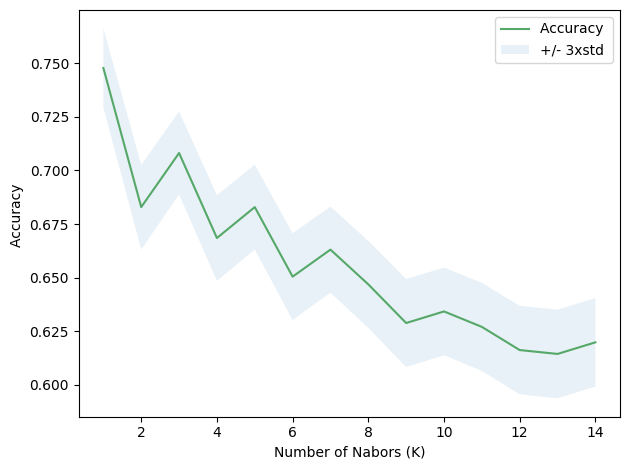

KNN Jaccard index: 0.581
KNN F1-score: 0.732
Confusion Matrix:
[[34 13  1  0  1  0  0  0  0]
 [ 4 98 17  0  0  0  0  0  0]
 [ 0 27 69  1  0  0  0  1  0]
 [ 1  0  1 15  2  4  0  2  0]
 [ 0  2  0  1 25  7  3  6  2]
 [ 0  0  0  2  5 60  0  9  2]
 [ 0  0  0  0  1  2 12  1  0]
 [ 0  4  0  2  8  9  1 63  3]
 [ 0  0  0  1  0  0  0  2 31]]

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.69      0.77        49
           2       0.68      0.82      0.75       119
           3       0.78      0.70      0.74        98
           4       0.68      0.60      0.64        25
           5       0.60      0.54      0.57        46
           6       0.73      0.77      0.75        78
           7       0.75      0.75      0.75        16
           8       0.75      0.70      0.72        90
           9       0.82      0.91      0.86        34

    accuracy                           0.73       555
   macro avg       0.74      0.72      0.73   

In [37]:

from sklearn.neighbors import KNeighborsClassifier
# to chose the best k value we may run in range of valus
Ks =15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusMtx = [];

for n in range(1,Ks):
    KNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = KNN_model.predict(X_test)

    mean_acc[n-1]= np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

k = 3    #it seems 3 is good enough
KNN_model = KNeighborsClassifier(n_neighbors=k ,leaf_size=50, p=1,  weights='distance' ).fit(X_train, y_train)

#plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

yhat_KNN = KNN_model.predict(X_test)

jKNN  = jaccard_score(y_test, yhat_KNN, average = 'weighted')
f1KNN = f1_score(y_test, yhat_KNN, average='weighted')
print("KNN Jaccard index: %.3f" % jKNN )
print("KNN F1-score: %.3f" % f1KNN  )

conf_KNN = confusion_matrix(y_test, yhat_KNN)
print("Confusion Matrix:")
print(conf_KNN)

print("\nClassification Report:")
print(classification_report(y_test, yhat_KNN))

## Training the Decision Tree classifier

The Decision Tree Classifier is a popular algorithm used for classification tasks in machine learning. It is a non-parametric supervised learning method that is simple to understand and interpret, making it a valuable tool for both beginners and experts in the field.

Here's a succinct definition of the Decision Tree Classifier:

The Decision Tree Classifier builds a tree-like structure where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents a class label. During training, the algorithm recursively splits the dataset into subsets based on the values of features, aiming to maximize the homogeneity of classes within each subset. This process continues until the tree reaches a predefined depth or no further splits can be made.

Key features and advantages of the Decision Tree Classifier include:

1. **Interpretability**: The resulting tree structure is easy to understand and interpret, allowing users to gain insights into the decision-making process.
2. **Non-parametric**: Does not make any assumptions about the underlying data distribution, making it suitable for both linear and non-linear relationships between features and class labels.
3. **Handles Mixed Data Types**: Can handle datasets with both numerical and categorical features without requiring data preprocessing.
4. **Feature Importance**: Provides a measure of feature importance, indicating which features are most influential in making classification decisions.
5. **Robustness to Outliers**: Robust to outliers and noisy data, as the algorithm focuses on making decisions based on majority voting within subsets.
6. **Efficiency**: Relatively fast to train and can handle large datasets with high dimensionality.

Despite its many advantages, the Decision Tree Classifier has some limitations, including:

1. **Overfitting**: Prone to overfitting, especially with deep trees or noisy datasets. Techniques such as pruning or limiting the tree depth can help mitigate this issue.
2. **Instability**: Small changes in the training data can lead to significant changes in the resulting tree structure, making the model somewhat unstable.
3. **Bias Towards Features with Many Levels**: Tends to favor features with many levels or categories, potentially leading to biased classification.

Overall, the Decision Tree Classifier is a versatile and widely-used algorithm that excels in a variety of classification tasks. Its simplicity, interpretability, and ability to handle mixed data types make it a valuable tool in the machine learning toolkit.

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 25, min_samples_split=3 )
DT_model.fit(X_train,y_train)
DT_model

yhat_DT = DT_model.predict(X_test)

jDT  = jaccard_score(y_test, yhat_DT, average = 'weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')
print("DT Jaccard index: %.3f" % jDT )
print("DT F1-score: %.3f" % f1DT )

conf_DT = confusion_matrix(y_test, yhat_DT)
print("Confusion Matrix:")
print(conf_DT)

print("\nClassification Report:")
print(classification_report(y_test, yhat_DT))

DT Jaccard index: 0.456
DT F1-score: 0.618
Confusion Matrix:
[[32 12  4  1  0  0  0  0  0]
 [11 81 24  0  2  0  0  1  0]
 [ 3 27 65  1  1  1  0  0  0]
 [ 1  0  2 14  2  5  0  1  0]
 [ 0  3  2  4 16 12  3  6  0]
 [ 0  0  0  4 14 42  3 13  2]
 [ 0  0  0  2  1  2 11  0  0]
 [ 0  0  5  4  9 15  0 52  5]
 [ 0  0  0  1  1  2  0  0 30]]

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.65      0.67        49
           2       0.66      0.68      0.67       119
           3       0.64      0.66      0.65        98
           4       0.45      0.56      0.50        25
           5       0.35      0.35      0.35        46
           6       0.53      0.54      0.54        78
           7       0.65      0.69      0.67        16
           8       0.71      0.58      0.64        90
           9       0.81      0.88      0.85        34

    accuracy                           0.62       555
   macro avg       0.61      0.62      0.61     

## Training the Logistic Regression classifier

The Logistic Regression Classifier is a fundamental algorithm used for binary classification tasks in machine learning. Despite its name, logistic regression is a classification algorithm rather than a regression one. It models the probability that a given data instance belongs to a particular class.

Here's a concise definition of the Logistic Regression Classifier:

The Logistic Regression Classifier models the relationship between the independent variables (features) and the probability of the binary outcome using the logistic function (also known as the sigmoid function). It estimates the parameters of the logistic function using optimization techniques such as gradient descent, aiming to maximize the likelihood of the observed data under the model.

Key features and advantages of the Logistic Regression Classifier include:

1. **Probabilistic Interpretation**: Provides probabilistic outputs, enabling interpretation of the confidence in the predicted class labels.
2. **Simple and Efficient**: Computationally efficient and easy to implement, making it suitable for large datasets.
3. **Interpretability**: Coefficients associated with each feature provide insights into the importance of features in predicting the outcome.
4. **Regularization**: Can be regularized to prevent overfitting, using techniques such as L1 (Lasso) or L2 (Ridge) regularization.
5. **Robust to Irrelevant Features**: Can handle datasets with irrelevant features by assigning lower weights to them during training.

Despite its simplicity and advantages, the Logistic Regression Classifier has some limitations, including:

1. **Assumption of Linearity**: Assumes a linear relationship between the features and the log-odds of the outcome, which may not always hold true in practice.
2. **Binary Classification Only**: Originally designed for binary classification tasks and may require extensions or modifications for multi-class classification.
3. **Vulnerability to Outliers**: Sensitive to outliers in the data, which can affect the estimated coefficients and predictions.

Overall, the Logistic Regression Classifier serves as a foundational algorithm in the field of machine learning, offering a balance between simplicity, interpretability, and performance for binary classification tasks. Its probabilistic nature and ease of interpretation make it a valuable tool in various domains, including healthcare, finance, and marketing.



In [40]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1).fit(X_train,y_train)
LR_model

yhat_LR = LR_model.predict(X_test)

jLR  = jaccard_score(y_test, yhat_LR, average = 'weighted')
f1LR = f1_score(y_test, yhat_LR, average='weighted')
print("LR Jaccard index: %.3f" % jLR )
print("LR F1-score: %.3f" % f1LR )

conf_LR = confusion_matrix(y_test, yhat_LR)
print("Confusion Matrix:")
print(conf_LR)

print("\nClassification Report:")
print(classification_report(y_test, yhat_LR))

LR Jaccard index: 0.406
LR F1-score: 0.561
Confusion Matrix:
[[35 14  0  0  0  0  0  0  0]
 [10 86 22  0  0  0  0  1  0]
 [ 1 36 56  2  2  0  0  1  0]
 [ 1  2  0  8  4  7  0  3  0]
 [ 0  3  0  3  3 24  2 11  0]
 [ 0  0  0  4  6 48  0 20  0]
 [ 0  0  0  2  1  2  6  5  0]
 [ 0  3  0  2  7 20  1 49  8]
 [ 0  0  0  0  0  3  0  5 26]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.71      0.73        49
           2       0.60      0.72      0.65       119
           3       0.72      0.57      0.64        98
           4       0.38      0.32      0.35        25
           5       0.13      0.07      0.09        46
           6       0.46      0.62      0.53        78
           7       0.67      0.38      0.48        16
           8       0.52      0.54      0.53        90
           9       0.76      0.76      0.76        34

    accuracy                           0.57       555
   macro avg       0.55      0.52      0.53     

##Training the Gradient Boosting (using scikit-learn's GradientBoostingClassifier)

The Gradient Boosting Classifier is a powerful ensemble learning method used for classification tasks in machine learning. It belongs to the family of boosting algorithms, which sequentially trains weak learners and combines their predictions to produce a strong learner.

Here's a succinct definition of the Gradient Boosting Classifier:

The Gradient Boosting Classifier builds an ensemble of decision trees sequentially, with each tree trained to correct the errors made by the previous trees. During training, the algorithm initially fits a weak learner, typically a shallow decision tree, to the dataset. Subsequent trees are then trained to predict the residuals (the differences between the predicted and actual values) of the previous trees. The final prediction is obtained by summing the predictions of all trees in the ensemble.

Key features and advantages of the Gradient Boosting Classifier include:

1. **High Predictive Accuracy**: Capable of achieving high predictive accuracy by iteratively improving upon the weaknesses of preceding models.
2. **Handles Non-linearity**: Can capture complex non-linear relationships between features and target variables.
3. **Robustness to Overfitting**: Less prone to overfitting compared to individual decision trees, thanks to regularization techniques such as shrinkage and tree pruning.
4. **Feature Importance**: Provides insights into the relative importance of different features in making predictions.
5. **Supports Different Loss Functions**: Can accommodate various loss functions, enabling optimization for different types of tasks (e.g., binary classification, multiclass classification, regression).
6. **Handles Missing Data**: Can handle datasets with missing values without requiring imputation, thanks to its tree-based structure.

Despite its many advantages, the Gradient Boosting Classifier has some limitations, including:

1. **Computational Complexity**: Training multiple decision trees sequentially can be computationally expensive, especially with large datasets and complex models.
2. **Sensitivity to Hyperparameters**: Performance may be sensitive to hyperparameters such as learning rate, tree depth, and number of trees, requiring careful tuning.
3. **Potential for Overfitting**: While less prone to overfitting than individual decision trees, gradient boosting models can still overfit if hyperparameters are not properly tuned.

Overall, the Gradient Boosting Classifier stands as a versatile and powerful algorithm that excels in a wide range of classification tasks. Its ability to learn complex relationships and produce accurate predictions makes it a popular choice among data scientists and machine learning practitioners.

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Gradient Boosting Classifier
GB_model = GradientBoostingClassifier()

# Fit the model
GB_model.fit(X_train, y_train)

# Make predictions
yhat_GB = GB_model.predict(X_test)

jGB  = jaccard_score(y_test, yhat_GB, average = 'weighted')
f1GB = f1_score(y_test, yhat_GB, average='weighted')

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_GB))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_GB))
print("Classification Report:\n", classification_report(y_test, y_pred_GB))


Accuracy: 0.6468468468468469
Confusion Matrix:
 [[33 16  0  0  0  0  0  0  0]
 [ 9 89 20  0  0  1  0  0  0]
 [ 1 31 63  2  0  0  0  1  0]
 [ 0  0  2 15  3  2  0  3  0]
 [ 0  2  1  2 12 16  4  9  0]
 [ 0  0  0  3  6 48  1 18  2]
 [ 0  0  0  0  1  3  8  3  1]
 [ 0  0  4  0  8 16  2 60  0]
 [ 0  0  0  0  0  1  0  2 31]]
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.67      0.72        49
           2       0.64      0.75      0.69       119
           3       0.70      0.64      0.67        98
           4       0.68      0.60      0.64        25
           5       0.40      0.26      0.32        46
           6       0.55      0.62      0.58        78
           7       0.53      0.50      0.52        16
           8       0.62      0.67      0.65        90
           9       0.91      0.91      0.91        34

    accuracy                           0.65       555
   macro avg       0.65      0.62      0.63       555
weighte

##Training the LightGBM Model

The LightGBM (Light Gradient Boosting Machine) Classifier is a state-of-the-art gradient boosting framework designed for fast and efficient training of decision tree-based models. It is widely used for classification tasks in machine learning and has gained popularity due to its speed, accuracy, and scalability.

Here's a concise definition of the LightGBM Classifier:

The LightGBM Classifier builds an ensemble of decision trees in a gradient boosting fashion, where each tree is grown sequentially to correct the errors made by the previous trees. However, what sets LightGBM apart is its innovative approach to tree building and leaf-wise growth strategy, which prioritizes the construction of deeper trees with fewer nodes.

Key features and advantages of the LightGBM Classifier include:

1. **Speed and Efficiency**: LightGBM is known for its speed and efficiency, making it suitable for training on large datasets with millions of samples and high-dimensional feature spaces.
2. **High Accuracy**: Despite its speed, LightGBM maintains high accuracy and often outperforms other gradient boosting frameworks.
3. **Scalability**: LightGBM can handle large-scale datasets with ease, thanks to its efficient data structures and parallelization techniques.
4. **Leaf-wise Tree Growth**: LightGBM adopts a leaf-wise tree growth strategy, which prioritizes expanding the leaf nodes that contribute the most to reducing the loss function. This approach leads to deeper trees and better model performance.
5. **Built-in Regularization**: LightGBM includes built-in regularization techniques such as L1 and L2 regularization, as well as feature sub-sampling and early stopping, to prevent overfitting.
6. **Supports Categorical Features**: LightGBM can handle categorical features directly without the need for one-hot encoding, saving memory and computational resources.

Despite its many advantages, the LightGBM Classifier also has some limitations, including:

1. **Memory Usage**: LightGBM may consume more memory than other algorithms, especially when dealing with large datasets and deep trees.
2. **Sensitivity to Hyperparameters**: Performance may be sensitive to hyperparameters such as learning rate, tree depth, and number of leaves, requiring careful tuning.
3. **Black Box Nature**: Like other ensemble methods, LightGBM is a black box model, making it challenging to interpret and understand the underlying decision-making process.

Overall, the LightGBM Classifier stands as a powerful and efficient algorithm that excels in various classification tasks. Its speed, accuracy, and scalability make it a popular choice for data scientists and machine learning practitioners working with large-scale datasets.

In [59]:
import lightgbm as lgb

# Create LightGBM Classifier
LGB_model = lgb.LGBMClassifier()

# Fit the model
LGB_model.fit(X_train, y_train)

# Make predictions
yhat_LGB = LGB_model.predict(X_test)

jLGB  = jaccard_score(y_test, yhat_LGB, average = 'weighted')
f1LGB = f1_score(y_test, yhat_LGB, average='weighted')

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_LGB))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LGB))
print("Classification Report:\n", classification_report(y_test, y_pred_LGB))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 2216, number of used features: 7
[LightGBM] [Info] Start training from score -2.356352
[LightGBM] [Info] Start training from score -1.484859
[LightGBM] [Info] Start training from score -1.742454
[LightGBM] [Info] Start training from score -2.883177
[LightGBM] [Info] Start training from score -2.573560
[LightGBM] [Info] Start training from score -1.999677
[LightGBM] [Info] Start training from score -3.576325
[LightGBM] [Info] Start training from score -1.892318
[LightGBM] [Info] Start training from score -2.859272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Ac

##Training the CatBoost Model

CatBoost, short for Categorical Boosting, is a gradient boosting algorithm developed by Yandex. It is specifically designed to handle categorical features efficiently and has gained popularity due to its strong performance in both classification and regression tasks.

Here's a concise definition of CatBoost:

CatBoost is a gradient boosting framework that builds an ensemble of decision trees in a sequential manner, similar to other gradient boosting algorithms. However, CatBoost incorporates several innovations and optimizations to improve training speed, model performance, and handling of categorical features.

Key features and advantages of CatBoost include:

1. **Handling of Categorical Features**: CatBoost can directly handle categorical features without the need for one-hot encoding or pre-processing. It uses an efficient method called ordered boosting, which sorts the categorical values and finds the optimal split points during tree construction.
2. **Fast and Scalable**: CatBoost is designed for speed and scalability, making it suitable for training on large datasets with millions of samples and high-dimensional feature spaces. It implements parallelization techniques to accelerate training on multi-core CPUs and GPUs.
3. **Robust to Overfitting**: CatBoost includes built-in regularization techniques such as L2 regularization, bagging, and early stopping to prevent overfitting and improve generalization performance.
4. **Supports Various Loss Functions**: CatBoost supports various loss functions for classification and regression tasks, including binary cross-entropy, multi-class cross-entropy, and mean squared error.
5. **Feature Importance**: CatBoost provides insights into feature importance, allowing users to understand which features contribute the most to the model's predictions.
6. **Handles Missing Values**: CatBoost can handle missing values in the dataset without requiring imputation, using a special algorithm to propagate missing values through the trees during training.

Despite its many advantages, CatBoost also has some limitations, including:

1. **Computational Complexity**: Training CatBoost models can be computationally intensive, especially with large datasets and complex models.
2. **Memory Usage**: CatBoost may consume more memory than other algorithms, especially when dealing with large datasets and deep trees.
3. **Hyperparameter Tuning**: Performance may be sensitive to hyperparameters such as learning rate, tree depth, and regularization parameters, requiring careful tuning.

Overall, CatBoost stands as a powerful and efficient algorithm for gradient boosting tasks, particularly when dealing with categorical features. Its ability to handle categorical data directly, combined with its speed, scalability, and robustness, makes it a valuable tool for data scientists and machine learning practitioners.

In [60]:
from catboost import CatBoostClassifier

# Create CatBoost Classifier
CatBoost_model = CatBoostClassifier()

# Fit the model
CatBoost_model.fit(X_train, y_train)

# Make predictions
yhat_CatBoost = CatBoost_model.predict(X_test)

jCatBoost  = jaccard_score(y_test, yhat_CatBoost, average = 'weighted')
f1CatBoost = f1_score(y_test, yhat_CatBoost, average='weighted')

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_CatBoost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_CatBoost))
print("Classification Report:\n", classification_report(y_test, y_pred_CatBoost))


Learning rate set to 0.082404
0:	learn: 2.0411002	total: 62.8ms	remaining: 1m 2s
1:	learn: 1.9212063	total: 89.4ms	remaining: 44.6s
2:	learn: 1.8280332	total: 120ms	remaining: 39.9s
3:	learn: 1.7451859	total: 151ms	remaining: 37.7s
4:	learn: 1.6702664	total: 179ms	remaining: 35.7s
5:	learn: 1.6085914	total: 211ms	remaining: 34.9s
6:	learn: 1.5532351	total: 242ms	remaining: 34.3s
7:	learn: 1.5024712	total: 268ms	remaining: 33.2s
8:	learn: 1.4582218	total: 298ms	remaining: 32.8s
9:	learn: 1.4204036	total: 328ms	remaining: 32.4s
10:	learn: 1.3831002	total: 347ms	remaining: 31.2s
11:	learn: 1.3468481	total: 372ms	remaining: 30.7s
12:	learn: 1.3129008	total: 400ms	remaining: 30.4s
13:	learn: 1.2832879	total: 431ms	remaining: 30.3s
14:	learn: 1.2622370	total: 437ms	remaining: 28.7s
15:	learn: 1.2337646	total: 461ms	remaining: 28.4s
16:	learn: 1.2095044	total: 480ms	remaining: 27.7s
17:	learn: 1.1863722	total: 497ms	remaining: 27.1s
18:	learn: 1.1647401	total: 517ms	remaining: 26.7s
19:	learn

#### Table E1, Create dataframe of model evaluation

In [61]:
# create dictionary with calculated errors as variables
data_frame1 ={'Model type': ['SVM', 'GPC', 'RFC', 'NNC', 'KNN', 'DT', 'LR', 'GB', 'LGB', 'CatBoost'],
       'Jaccard index': [jSVM, jGPC, jRFC, jNNC, jKNN, jDT, jLR, jGB, jLGB, jCatBoost],
       'F1-Score': [f1SVM, f1GPC, f1RFC, f1NNC, f1KNN, f1DT, f1LR, f1GB, f1LGB, f1CatBoost]
            }
df1 = pd.DataFrame(data_frame1, columns = ['Model type','Jaccard index','F1-Score' ] )
df1.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.57,0.72
1,GPC,0.47,0.63
2,RFC,0.55,0.70
3,NNC,0.55,0.71
4,KNN,0.58,0.73
5,DT,0.46,0.62
6,LR,0.41,0.56
7,GB,0.49,0.64
8,LGB,0.56,0.71
9,CatBoost,0.58,0.73


## Applying the classification model to the blind data

As we selected one well out of the training data from traning and model fitting process, it can be good estimate to see how models work.

Let's store target labet from blind well in:

In [42]:
y_blind = blind['Facies'].values

Calling the same features for prediction, by dropping some of the columns and making a new dataframe:

In [43]:
blind_features = blind.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

Now we can transform this with the scaler we made before:

In [44]:
X_blind = scaler.transform(blind_features)

Now it's a simple matter of making a prediction and storing it back in the dataframe:

#### Predicting facies for blind well by all models

In [70]:
#SVM
yhat_blind_SVM = SVM_model.predict(X_blind)
blind['SVM_Pred'] = yhat_blind_SVM

#GPC
yhat_blind_GPC = GPC_model.predict(X_blind)
blind['GPC_Pred'] = yhat_blind_GPC

#RFC
yhat_blind_RFC = RFC_model.predict(X_blind)
blind['RFC_Pred'] = yhat_blind_RFC

#NNC
yhat_blind_NNC = NNC_model.predict(X_blind)
blind['NNC_Pred'] = yhat_blind_NNC

#KNN
yhat_blind_KNN = KNN_model.predict(X_blind)
blind['KNN_Pred'] = yhat_blind_KNN

#DT
yhat_blind_DT = DT_model.predict(X_blind)
blind['DT_Pred'] = yhat_blind_DT

#LR
yhat_blind_LR = LR_model.predict(X_blind)
blind['LR_Pred'] = yhat_blind_LR

#GB
yhat_blind_GB = GB_model.predict(X_blind)
blind['GB_Pred'] = yhat_blind_GB

#LGB
yhat_blind_LGB = LGB_model.predict(X_blind)
blind['LGB_Pred'] = yhat_blind_LGB

#CatBoost
yhat_blind_CatBoost = CatBoost_model.predict(X_blind)
blind['CatBoost_Pred'] = yhat_blind_CatBoost




#### Let's see how prediction works on blind data:

In [63]:
#SVM
jSVM_b =  jaccard_score(y_blind, yhat_blind_SVM, average = 'weighted')
f1SVM_b = f1_score(y_blind, yhat_blind_SVM, average='weighted')
# print("SVM Jaccard index for blind well prediction: %.3f" %jSVM_b)
# print("SVM F1-score for blind well prediction: %.3f" %f1SVM_b )

#GPC
jGPC_b =jaccard_score(y_blind, yhat_blind_GPC, average = 'weighted')
f1GPC_b =f1_score(y_blind, yhat_blind_GPC, average='weighted')
# print("GPC Jaccard index for blind well prediction: %.3f" %jGPC_b )
# print("GPC F1-score for blind well prediction: %.3f" % f1GPC_b)

#RFC
jRFC_b =jaccard_score(y_blind, yhat_blind_RFC, average = 'weighted')
f1RFC_b=f1_score(y_blind, yhat_blind_RFC, average='weighted')
# print("RFC Jaccard index for blind well prediction: %.3f" % jRFC_b)
# print("RFC F1-score for blind well prediction: %.3f" % f1RFC_b)

#NNC
jNNC_b  =jaccard_score(y_blind, yhat_blind_NNC, average = 'weighted')
f1NNC_b =f1_score(y_blind, yhat_blind_NNC, average='weighted')
# print("NNC Jaccard index for blind well prediction: %.3f" %jNNC_b )
# print("NNC F1-score for blind well prediction: %.3f" %f1NNC_b )

#KNN
jKNN_b = jaccard_score(y_blind, yhat_blind_KNN, average = 'weighted')
f1KNN_b = f1_score(y_blind, yhat_blind_KNN, average='weighted')
# print("KNN Jaccard index for blind well prediction: %.3f" % jKNN_b)
# print("KNN F1-score for blind well prediction: %.3f" %f1KNN_b  )

#DT
jDT_b = jaccard_score(y_blind, yhat_blind_DT, average = 'weighted')
f1DT_b =f1_score(y_blind, yhat_blind_DT, average='weighted')
# print("DT Jaccard index for blind well prediction: %.3f" % jDT_b)
# print("DT F1-score for blind well prediction: %.3f" % f1DT_b )

#LR
jLR_b  = jaccard_score(y_blind, yhat_blind_LR, average = 'weighted')
f1LR_b = f1_score(y_blind, yhat_blind_LR, average='weighted')
# print("LR Jaccard index for blind well prediction: %.3f" % jLR_b)
# print("LR F1-score for blind well prediction: %.3f" %f1LR_b )

#GB
jGB_b  = jaccard_score(y_blind, yhat_blind_GB, average = 'weighted')
f1GB_b = f1_score(y_blind, yhat_blind_GB, average='weighted')
# print("GB Jaccard index for blind well prediction: %.3f" % jGB_b)
# print("GB F1-score for blind well prediction: %.3f" %f1GB_b )

#LGB
jLGB_b  = jaccard_score(y_blind, yhat_blind_LGB, average = 'weighted')
f1LGB_b = f1_score(y_blind, yhat_blind_LGB, average='weighted')
# print("LGB Jaccard index for blind well prediction: %.3f" % jLGB_b)
# print("LGB F1-score for blind well prediction: %.3f" %f1LGB_b )

#CatBoost
jCatBoost_b  = jaccard_score(y_blind, yhat_blind_CatBoost, average = 'weighted')
f1CatBoost_b = f1_score(y_blind, yhat_blind_CatBoost, average='weighted')
# print("LR Jaccard index for blind well prediction: %.3f" % jCatBoost_b)
# print("LR F1-score for blind well prediction: %.3f" %f1CatBoost_b )


#### Table E2, Create dataframe of model evaluation for blind well performance

In [64]:
data_frame2 ={'Model type': ['SVM', 'GPC', 'RFC', 'NNC', 'KNN', 'DT', 'LR', 'GB', 'LGB', 'CatBoost'],
       'Jaccard index': [jSVM_b, jGPC_b, jRFC_b, jNNC_b, jKNN_b, jDT_b, jLR_b, jGB_b, jLGB_b, jCatBoost_b],
       'F1-Score': [f1SVM_b, f1GPC_b, f1RFC_b, f1NNC_b, f1KNN_b, f1DT_b, f1LR_b, f1GB_b, f1LGB_b, f1CatBoost_b]
            }
df2 = pd.DataFrame(data_frame2, columns = ['Model type','Jaccard index','F1-Score' ] )
df2.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.32,0.48
1,GPC,0.40,0.56
2,RFC,0.46,0.62
3,NNC,0.40,0.56
4,KNN,0.35,0.51
5,DT,0.33,0.49
6,LR,0.42,0.58
7,GB,0.46,0.63
8,LGB,0.46,0.63
9,CatBoost,0.46,0.63


Now we can plot one of the model's prediction performance with blind well data.

In [48]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

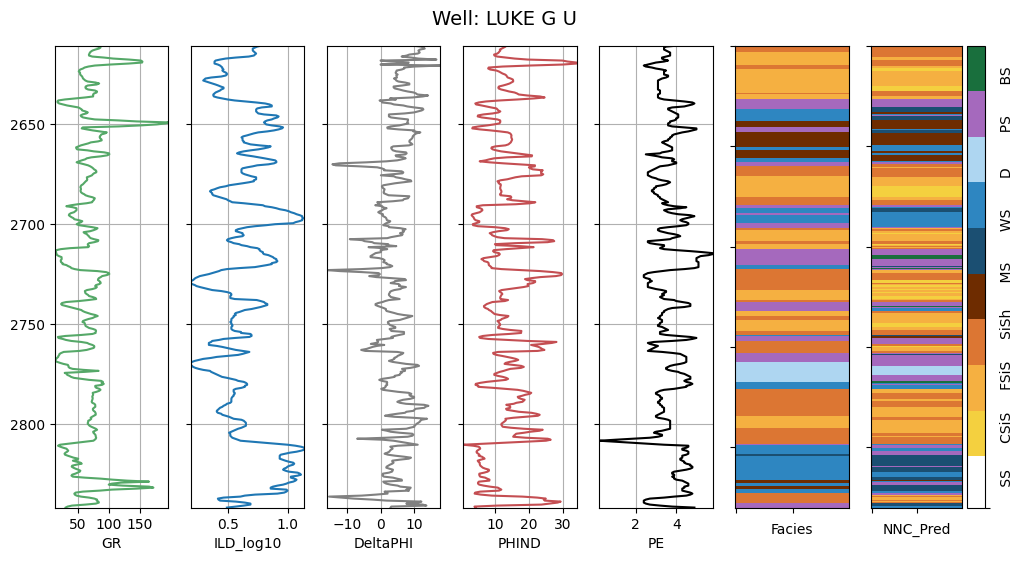

In [79]:
#let's plot NNC result
compare_facies_plot(blind, 'NNC_Pred', facies_colors)
#plt.savefig("NNC.png", dpi=400)

#### Create a section to compare various model performance in facies prediction

In [77]:
def compare_all_facies(logs, Pred1, Pred2, Pred3, Pred4, Pred5, Pred6, Pred7, Pred8, Pred9, Pred10, facies_colors):
    # make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop = logs.Depth.min()
    zbot = logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values, 1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[Pred1].values, 1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[Pred2].values, 1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[Pred3].values, 1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[Pred4].values, 1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[Pred5].values, 1), 100, 1)
    cluster7 = np.repeat(np.expand_dims(logs[Pred6].values, 1), 100, 1)
    cluster8 = np.repeat(np.expand_dims(logs[Pred7].values, 1), 100, 1)
    cluster9 = np.repeat(np.expand_dims(logs[Pred8].values, 1), 100, 1)
    cluster10 = np.repeat(np.expand_dims(logs[Pred9].values, 1), 100, 1)
    cluster11 = np.repeat(np.expand_dims(logs[Pred10].values, 1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=11, figsize=(12, 6))

    im1 = ax[0].imshow(cluster1, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im2 = ax[1].imshow(cluster2, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im4 = ax[3].imshow(cluster4, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im5 = ax[4].imshow(cluster5, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im6 = ax[5].imshow(cluster6, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im7 = ax[6].imshow(cluster7, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im8 = ax[7].imshow(cluster8, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im9 = ax[8].imshow(cluster9, interpolation='none', aspect='auto',
                       cmap=cmap_facies, vmin=1, vmax=9)
    im10 = ax[9].imshow(cluster10, interpolation='none', aspect='auto',
                        cmap=cmap_facies, vmin=1, vmax=9)
    im11 = ax[10].imshow(cluster11, interpolation='none', aspect='auto',
                         cmap=cmap_facies, vmin=1, vmax=9)

    divider = make_axes_locatable(ax[10])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar = plt.colorbar(im8, cax=cax)
    cbar.set_label((5 * ' ').join([' SS ', 'CSiS', 'FSiS',
                                    'SiSh', ' MS ', ' WS ', ' D  ',
                                    ' PS ', ' BS ']))
    cbar.set_ticks(range(0, 1))
    cbar.set_ticklabels('')

    for i in range(len(ax) - 11):
        ax[i].set_ylim(ztop, zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=2)

    ax[0].set_xlabel('Facies')
    ax[1].set_xlabel(Pred1)
    ax[2].set_xlabel(Pred2)
    ax[3].set_xlabel(Pred3)
    ax[4].set_xlabel(Pred4)
    ax[5].set_xlabel(Pred5)
    ax[6].set_xlabel(Pred6)
    ax[7].set_xlabel(Pred7)
    ax[8].set_xlabel(Pred8)
    ax[9].set_xlabel(Pred9)
    ax[10].set_xlabel(Pred10)

    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])
    ax[5].set_yticklabels([])
    ax[6].set_yticklabels([])
    ax[7].set_yticklabels([])
    ax[8].set_yticklabels([])
    ax[9].set_yticklabels([])
    ax[10].set_yticklabels([])

    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])
    ax[2].set_xticklabels([])
    ax[3].set_xticklabels([])
    ax[4].set_xticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    ax[8].set_xticklabels([])
    ax[9].set_xticklabels([])
    ax[10].set_xticklabels([])

    f.suptitle('Various model predictions in well: %s' % logs.iloc[0]['Well Name'], fontsize=14, y=0.94)


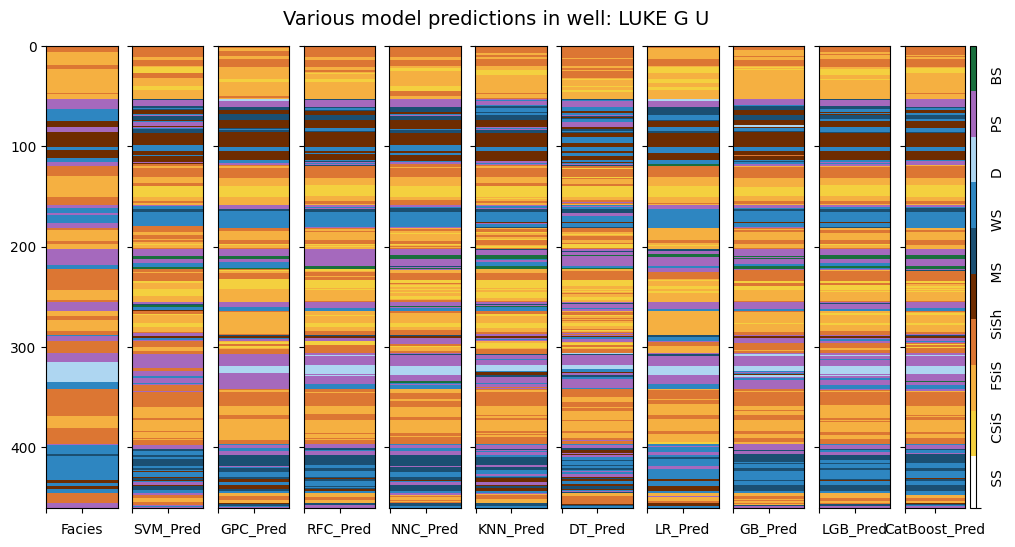

In [78]:
compare_all_facies(blind,'SVM_Pred','GPC_Pred','RFC_Pred', 'NNC_Pred', 'KNN_Pred','DT_Pred', 'LR_Pred', 'GB_Pred', 'LGB_Pred', 'CatBoost_Pred', facies_colors)
plt.savefig("Compo.png", dpi=400)

## Conclustion:

1. SVM, CatBoost, KNN, and LGB demonstrate superior performance on the test data (table E1).
2. However, upon evaluating the models with new data (blind well), their performance diminishes (table E2).
3. This decline in performance can be attributed to the scarcity of data. Upon closer examination of the final cross-section, it becomes evident that certain facies, such as SS, CSiS, and FSiS, exhibit a strong correlation with the real facies distribution. Conversely, PS demonstrates the next best agreement with the actual data, while BS and D show the weakest correlation.
4. This observed trend aligns with the frequency of data samples, as indicated in the initial step of data preprocessing through the bar chart. Facies prediction accuracy tends to improve when there is an ample number of samples available in the training dataset.
5. To enhance the results, two critical aspects should be addressed: firstly, increasing the volume of data samples available to the models, and secondly, meticulously optimizing model parameters.

## References

Amato del Monte, A., 2015. Seismic Petrophysics: Part 1, *The Leading Edge*, 34 (4). [doi:10.1190/tle34040440.1](http://dx.doi.org/10.1190/tle34040440.1)

Bohling, G. C., and M. K. Dubois, 2003. An Integrated Application of Neural Network and Markov Chain Techniques to Prediction of Lithofacies from Well Logs, *KGS Open-File Report* 2003-50, 6 pp. [pdf](http://www.kgs.ku.edu/PRS/publication/2003/ofr2003-50.pdf)

Dubois, M. K., G. C. Bohling, and S. Chakrabarti, 2007, Comparison of four approaches to a rock facies classification problem, *Computers & Geosciences*, 33 (5), 599-617 pp. [doi:10.1016/j.cageo.2006.08.011](http://dx.doi.org/10.1016/j.cageo.2006.08.011)

